In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression

In [2]:
# Importing the data set
df = pd.read_csv("BostonHousing.csv")

This data frame contains the following columns:

    crim : per capita crime rate by town.

    zn: proportion of residential land zoned for lots over 25,000 sq.ft.

    indus: proportion of non-retail business acres per town.

    chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

    nox: nitrogen oxides concentration (parts per 10 million).

    rm: average number of rooms per dwelling.

    age: proportion of owner-occupied units built prior to 1940.

    dis: weighted mean of distances to five Boston employment centres.

    rad: index of accessibility to radial highways.

    tax: full-value property-tax rate per $10,000.

    ptratio: pupil-teacher ratio by town.

    black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

    lstat: lower status of the population (percent).

    medv: median value of owner-occupied homes in $1000s.

### Question 1: Describe the data:
1. What missing values are there?
2. What are the summary statistics of the numerical features?
3. What do the distributions of the features look like?

In [3]:
# What are the missing values?
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
# Standardize the data set
import pandas as pd
from sklearn import preprocessing

names = df.columns
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=names)

#### Comment: No NaN values in the dataset

In [5]:
# Summary Statistics:

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-2.808469e-16,-4.563763e-17,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


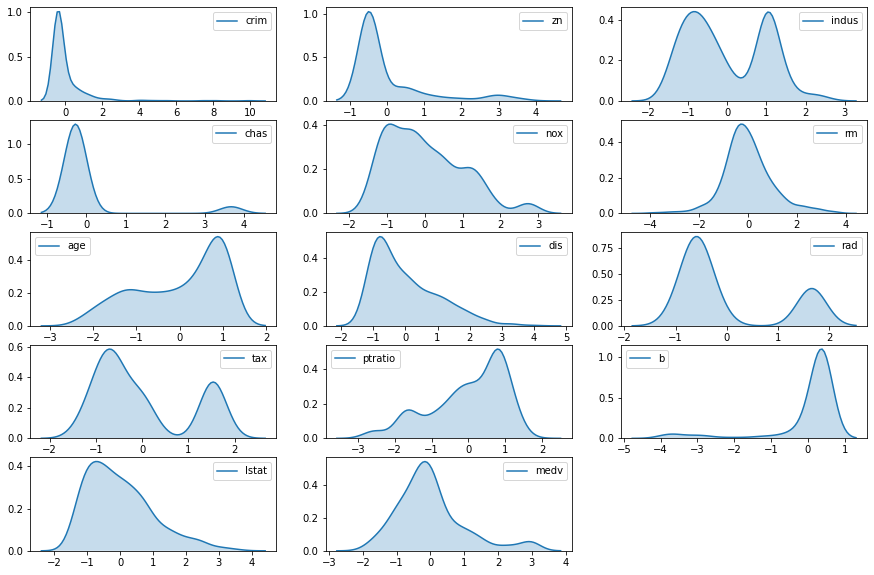

In [6]:
# Plotting the distributions of the data:
plt.figure(figsize = (15,10))

for i in np.arange(1,len(df.columns)+1):
    plt.subplot(5,3,i)
    sns.kdeplot( df.iloc[:,i-1], shade = True)
    plt.legend()



#### These might be outliers 

In [ ]:
df = df[((df['medv'] < 50)) & ((df['crim'] < 50) & (df['zn'] < 60))]
X = df_outlier[['lstat','rm','ptratio']]
y = df_outlier['medv']

In [ ]:
# Plotting the distributions of the data:
plt.figure(figsize = (15,10))

for i in np.arange(1,len(df_outlier.columns)+1):
    plt.subplot(5,3,i)
    sns.kdeplot( df_outlier.iloc[:,i-1], shade = True)
    plt.legend()



### 2. What features are most correlated with housing price?

In [ ]:
# Correlation matrix between the columns:

corr = df.corr()
display(corr)

In [ ]:
plt.figure(figsize = (13,10))
ax = sns.heatmap(corr, annot=True)

In [ ]:
# Sorting the absolute values of the correlations:

corr['medv'].abs().sort_values(ascending= False)

#### Highly correlated with Housing Prices (medv):
1. Lstat (Negative Correlation): lower status of the population (percent)
   Intuative since housing prices would decrease in the neighborhoods with lower status
   
2. rm: average number of rooms per dwelling
    Bigger houses = Expensive Houses

3. Ptratio: pupil-teacher ratio by town:
   Might just be a proxy for better schools

### Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price

Candidates for new features:

a. lstat and crim might represent similar information and can be combined together in some    feature. They have a positive correlation of 0.46, which might 

b. zn has  high negeative correlation with indus, nox and age, and can probably be used as    proxy for these three features

In [ ]:
# Inserting the relavant features into the model:
X = df[['lstat','zn','ptratio']]
y = df['medv']

### With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.

In [ ]:
df.head()

In [ ]:
print(f"Head of features:{X.head()}")

print(f"Head of Model:{y.head()}")

In [ ]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
viz_train = plt
viz_train.scatter(X_test['lstat'], y_test, color='red', s = 10, label = 'actual')
viz_train.scatter(X_test['lstat'], regressor.predict(X_test), color='blue', s = 10, label = 'predicted')
viz_train.title('Actual v/s Predicted Housing Prices')
viz_train.xlabel('Index (Lsat)')
viz_train.legend()
viz_train.show()

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
# Data seems to be of a higher order:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree= 2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()

In [ ]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size= 0.2, random_state= 0)

In [ ]:
pol_reg.fit(X_poly_train, y_poly_train)

In [ ]:
y_poly_pred = pol_reg.predict(X_poly_train)

In [ ]:
r2_score(y_poly_test, y_poly_pred)

In [ ]:
poly_reg